<a href="https://colab.research.google.com/github/suneetha1414/FMML/blob/main/CSC(DS)_team8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOTEL BOOKING PRICE PREDICTION

In [ ]:

import numpy as np # linear algebra
import pandas as pd
print(pd.__version__)
!pip uninstall pandas -y
!pip install pandas
 # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2.2.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 51.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!pip install -U git+https://github.com/sfu-db/dataprep.git@develop --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.8/702.8 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.9 MB/s eta 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
booking = pd.read_csv('/hotel_bookings.csv')

In [ ]:
booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29259,Resort Hotel,0,386,2016,October,43,20,1,3,2,...,No Deposit,NaN,NaN,0,Transient-Party,49.00,0,0,Check-Out,2016-10-24
29260,Resort Hotel,0,77,2016,October,43,17,2,5,2,...,No Deposit,NaN,NaN,0,Transient,10.00,0,0,Check-Out,2016-10-24
29261,Resort Hotel,0,134,2016,October,43,17,2,5,2,...,No Deposit,240.0,NaN,0,Transient,100.00,0,2,Check-Out,2016-10-24
29262,Resort Hotel,0,220,2016,October,43,17,2,5,2,...,No Deposit,243.0,NaN,0,Contract,72.75,0,0,Check-Out,2016-10-24


In [ ]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29264 entries, 0 to 29263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29264 non-null  object 
 1   is_canceled                     29264 non-null  int64  
 2   lead_time                       29264 non-null  int64  
 3   arrival_date_year               29264 non-null  int64  
 4   arrival_date_month              29264 non-null  object 
 5   arrival_date_week_number        29264 non-null  int64  
 6   arrival_date_day_of_month       29264 non-null  int64  
 7   stays_in_weekend_nights         29264 non-null  int64  
 8   stays_in_week_nights            29264 non-null  int64  
 9   adults                          29264 non-null  int64  
 10  children                        29264 non-null  int64  
 11  babies                          29264 non-null  int64  
 12  meal                            

In [ ]:
booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,23221.000000,2351.000000,29264.000000,29264.000000,29264.000000,29264.000000
mean,0.379716,98.071453,2015.878144,28.171918,15.723141,1.199289,3.159069,1.875239,0.132381,0.013464,0.048900,0.139079,0.185142,0.260867,214.380345,224.101234,0.597048,95.116157,0.122403,0.560689
std,0.485324,99.541516,0.656899,13.364027,8.854226,1.144869,2.448000,0.768567,0.455187,0.116724,0.215662,1.560389,1.154339,0.691890,84.038022,114.949902,7.910657,60.679642,0.335179,0.781501
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,13.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,135.000000,0.000000,50.400000,0.000000,0.000000
50%,0.000000,65.000000,2016.000000,30.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,76.000000,0.000000,0.000000
75%,1.000000,163.000000,2016.000000,39.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,242.000000,291.500000,0.000000,126.600000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,531.000000,543.000000,150.000000,508.000000,8.000000,5.000000


In [ ]:
booking.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29259,Resort Hotel,0,386,2016,October,43,20,1,3,2,...,No Deposit,NaN,NaN,0,Transient-Party,49.00,0,0,Check-Out,2016-10-24
29260,Resort Hotel,0,77,2016,October,43,17,2,5,2,...,No Deposit,NaN,NaN,0,Transient,10.00,0,0,Check-Out,2016-10-24
29261,Resort Hotel,0,134,2016,October,43,17,2,5,2,...,No Deposit,240.0,NaN,0,Transient,100.00,0,2,Check-Out,2016-10-24
29262,Resort Hotel,0,220,2016,October,43,17,2,5,2,...,No Deposit,243.0,NaN,0,Contract,72.75,0,0,Check-Out,2016-10-24
29263,Resort Hotel,0,189,2016,October,43,21,1,2,3,...,No Deposit,314.0,NaN,0,Transient,72.56,0,1,Check-Out,2016-10


In [ ]:
booking.shape

(29264, 32)

In [ ]:
booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
import pandas as pd

# Sample definition of the hotel DataFrame
hotel = pd.DataFrame({
    'is_canceled': [0, 1, 1, 0, 0],
    # Add other columns as necessary
})

# Calculate correlation
correlation = hotel.corr().abs()['is_canceled'].sort_values(ascending=False)

In [ ]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29264 entries, 0 to 29263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29264 non-null  object 
 1   is_canceled                     29264 non-null  int64  
 2   lead_time                       29264 non-null  int64  
 3   arrival_date_year               29264 non-null  int64  
 4   arrival_date_month              29264 non-null  object 
 5   arrival_date_week_number        29264 non-null  int64  
 6   arrival_date_day_of_month       29264 non-null  int64  
 7   stays_in_weekend_nights         29264 non-null  int64  
 8   stays_in_week_nights            29264 non-null  int64  
 9   adults                          29264 non-null  int64  
 10  children                        29264 non-null  int64  
 11  babies                          29264 non-null  int64  
 12  meal                            

In [ ]:
booking.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,29264,29264,29264,28803,29264,29264,29264,29264,29264,29264,29264,29264
unique,1,12,5,113,6,4,10,11,3,4,3,904
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-09
freq,29264,3840,21929,14357,12715,21086,17386,12866,27412,22533,18152,145


In [ ]:
for col in booking.describe(include='object').columns:
    print(col)
    print(booking[col].unique())
    print('-'*50)

hotel
['Resort Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SG

In [ ]:
booking.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
booking.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29259,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
29260,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
29261,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
29262,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


is_canceled
0    0.620284
1    0.379716
Name: proportion, dtype: float64


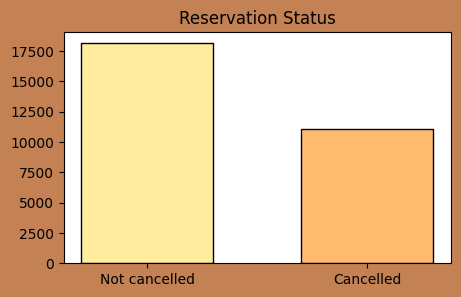

In [ ]:
cancelled_perc = booking['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

plt.figure(figsize = (5,3),facecolor="#C38154")
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],booking['is_canceled'].value_counts(), edgecolor = 'k', width = 0.6,color=colors)
plt.show()

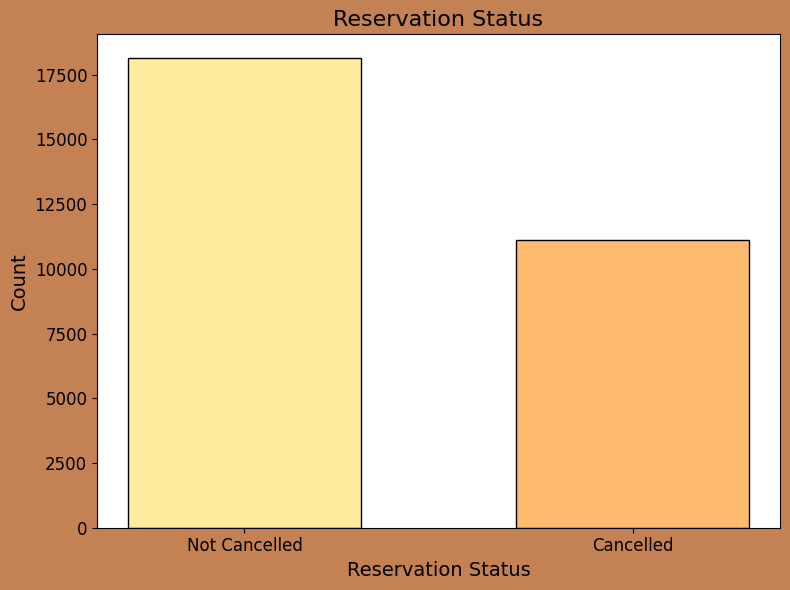

In [ ]:
cancelled_perc = booking['is_canceled'].value_counts(normalize=True)

# Define color palette
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

# Plot
plt.figure(figsize=(8, 6), facecolor='#C38154')  # Set background color to light gray
plt.title('Reservation Status', fontsize=16, color='Black')
plt.bar(['Not Cancelled', 'Cancelled'], booking['is_canceled'].value_counts(), edgecolor='black', width=0.6, color=colors)
plt.xlabel('Reservation Status', fontsize=14, color='Black')
plt.ylabel('Count', fontsize=14, color='Black')
plt.xticks(fontsize=12, color='Black')
plt.yticks(fontsize=12, color='Black')
plt.tight_layout()
plt.savefig('reservation_status_plot.png', bbox_inches='tight', transparent=True)
plt.show()

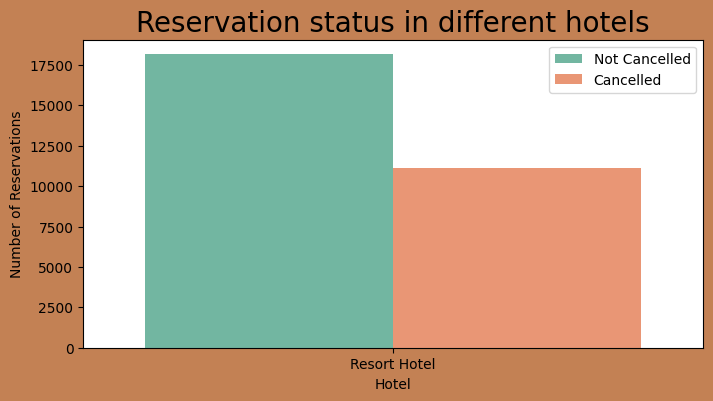

In [ ]:
plt.figure(figsize=(8, 4), facecolor='#C38154')

# Create the countplot
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=booking, palette="Set2")

# Customize legend location
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Set plot title and axis labels
plt.title('Reservation status in different hotels', size=20, color='Black')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Number of Reservations', color='Black')

# Customize legend labels
plt.legend(['Not Cancelled', 'Cancelled'])

# Show the plot
plt.show()


In [ ]:
resort_hotel= booking[booking['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

,proportion
is_canceled,
0,0.620284
1,0.379716


In [ ]:
City_Hotel = booking[booking['hotel']== 'City Hotel']
City_Hotel['is_canceled'].value_counts(normalize =True)

,proportion
is_canceled,


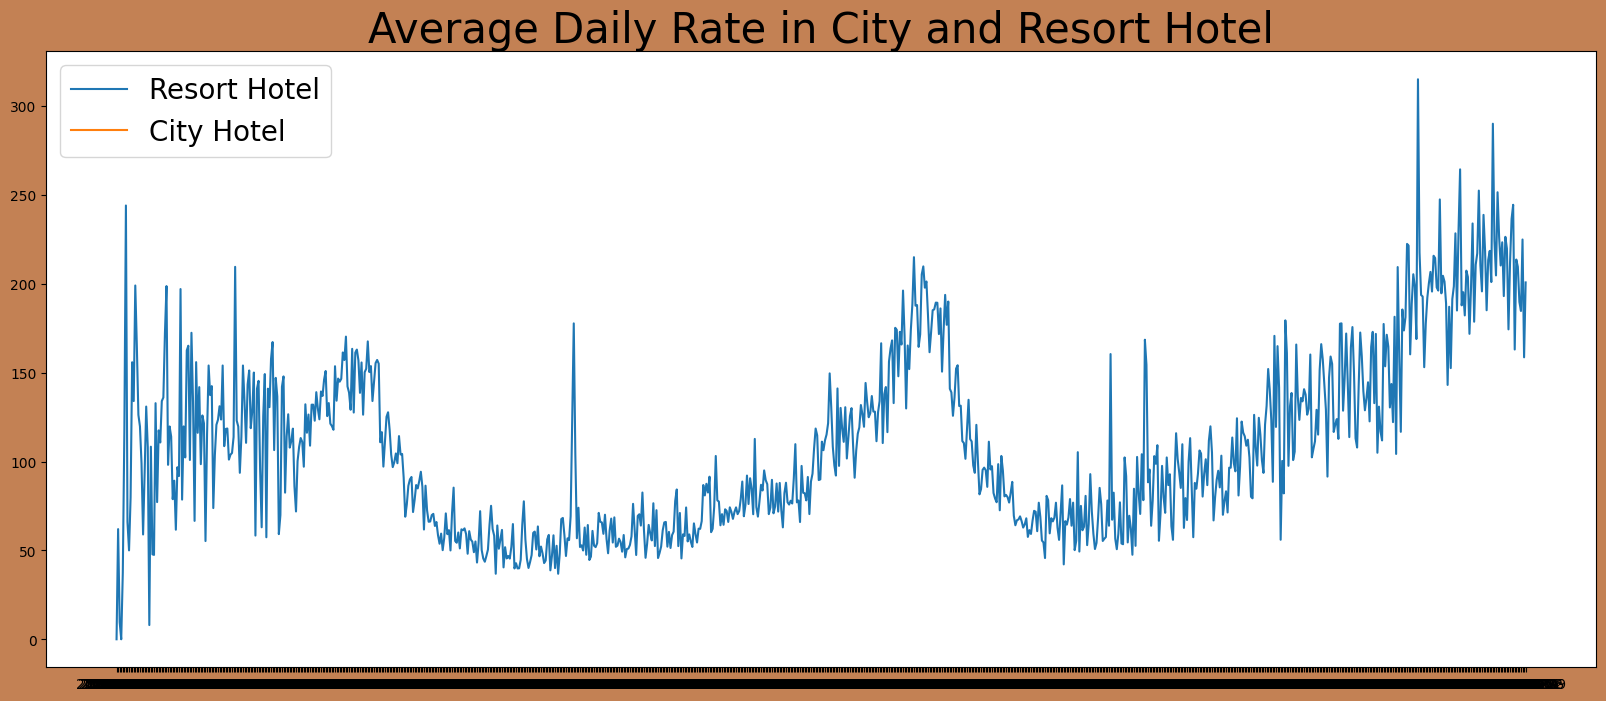

In [ ]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
City_Hotel = City_Hotel.groupby('reservation_status_date')[['adr']].mean()
plt.figure(figsize=(20,8), facecolor='#C38154')
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label = 'Resort Hotel')
plt.plot(City_Hotel.index,City_Hotel['adr'],label = 'City Hotel')
plt.legend(fontsize=20)
plt.show()

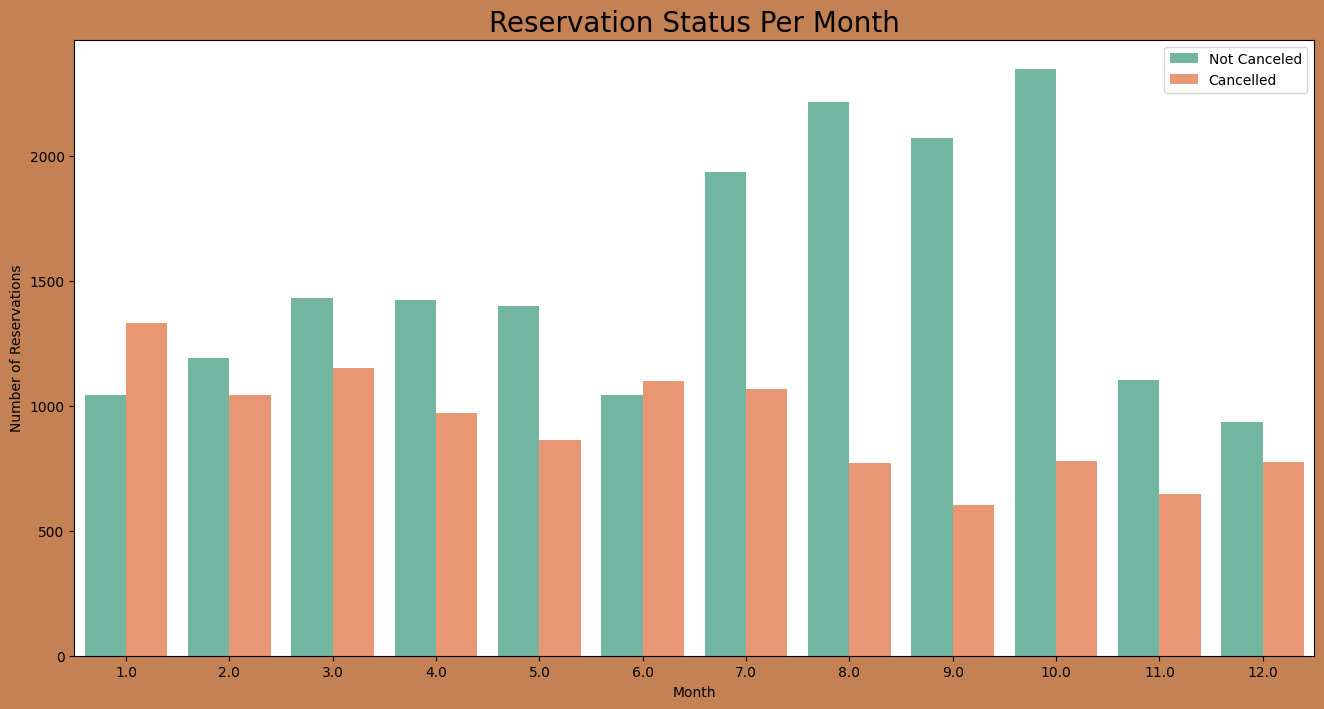

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'reservation_status_date' is in datetime format
booking['reservation_status_date'] = pd.to_datetime(booking['reservation_status_date'], errors='coerce')

# Check for any NaT values after conversion
if booking['reservation_status_date'].isnull().any():
    print("Warning: Some dates could not be converted and are set to NaT.")

# Extract the month from the reservation date
booking['month'] = booking['reservation_status_date'].dt.month

# Set the figure size and background color
plt.figure(figsize=(16, 8), facecolor='#C38154')

# Create the countplot
ax1 = sns.countplot(x='month', hue='is_canceled', data=booking, palette='Set2')

# Customize the legend
legend_labels, _ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size=20)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['Not Canceled', 'Cancelled'])  # Corrected the typo here

# Show the plot
plt.show()

In [ ]:
booking['adr']

,adr
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
29259,49.00
29260,10.00
29261,100.00
29262,72.75


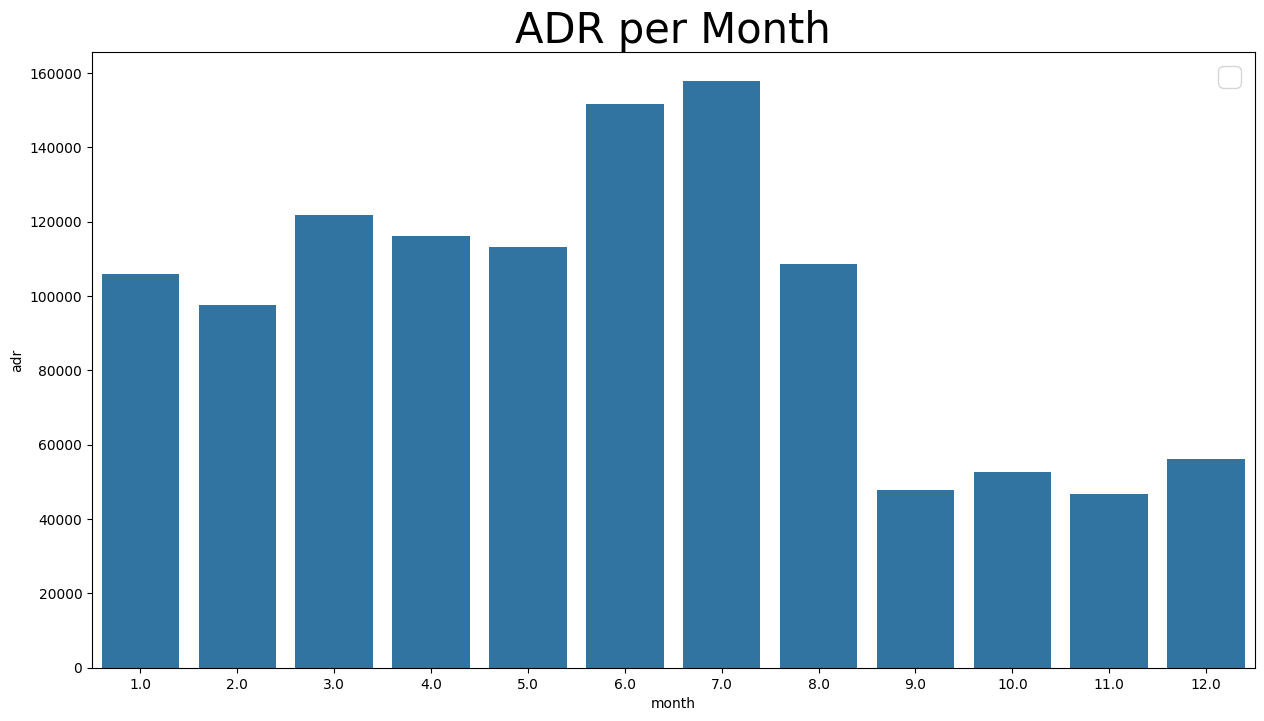

In [ ]:
plt.figure(figsize = (15,8))
plt.title('ADR per Month', fontsize = 30)
# data =df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()

data = booking[booking['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()
sns.barplot(x='month', y='adr', data = data )
plt.legend(fontsize = 20)
plt.show()

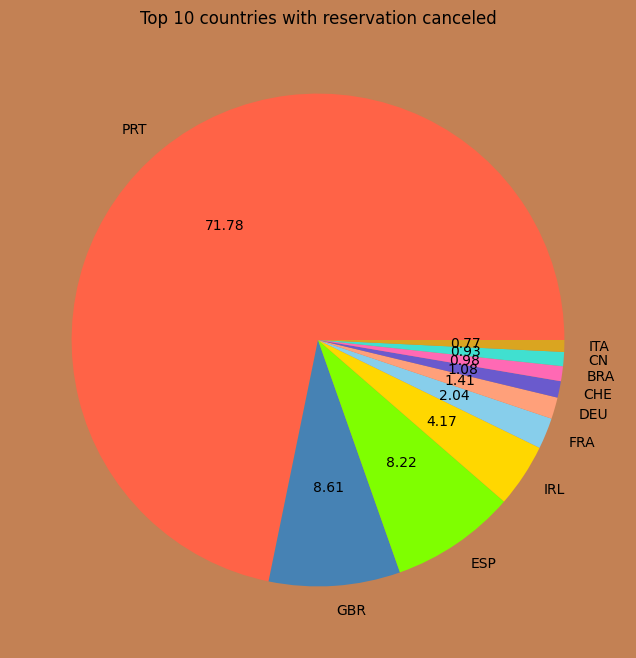

In [ ]:
cancelled_data= booking[booking['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
# plt.figure(figsize=(8,8), facecolor='#C38154')
# plt.title('Top 10 countries with reservation canceled',color="black")
# plt.pie(top_10_country, autopct ='%.2f', labels = top_10_country.index)
# plt.show()

# Custom colors for the pie chart
custom_colors = ['#FF6347', '#4682B4', '#7FFF00', '#FFD700', '#87CEEB', '#FFA07A', '#6A5ACD', '#FF69B4', '#40E0D0', '#DAA520']

plt.figure(figsize=(8, 8), facecolor='#C38154')  # Set background color to a light brown
plt.title('Top 10 countries with reservation canceled', color="black")
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index, colors=custom_colors)
plt.show()

In [ ]:
booking['market_segment'].value_counts()

,count
market_segment,
Online TA,12715
Offline TA/TO,5524
Groups,4618
Direct,4433
Corporate,1849
Complementary,125


In [ ]:
booking['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.434493
Offline TA/TO,0.188764
Groups,0.157805
Direct,0.151483
Corporate,0.063183
Complementary,0.004271


In [ ]:
cancelled_data['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.562275
Groups,0.222642
Offline TA/TO,0.102322
Direct,0.078474
Corporate,0.031317
Complementary,0.002970


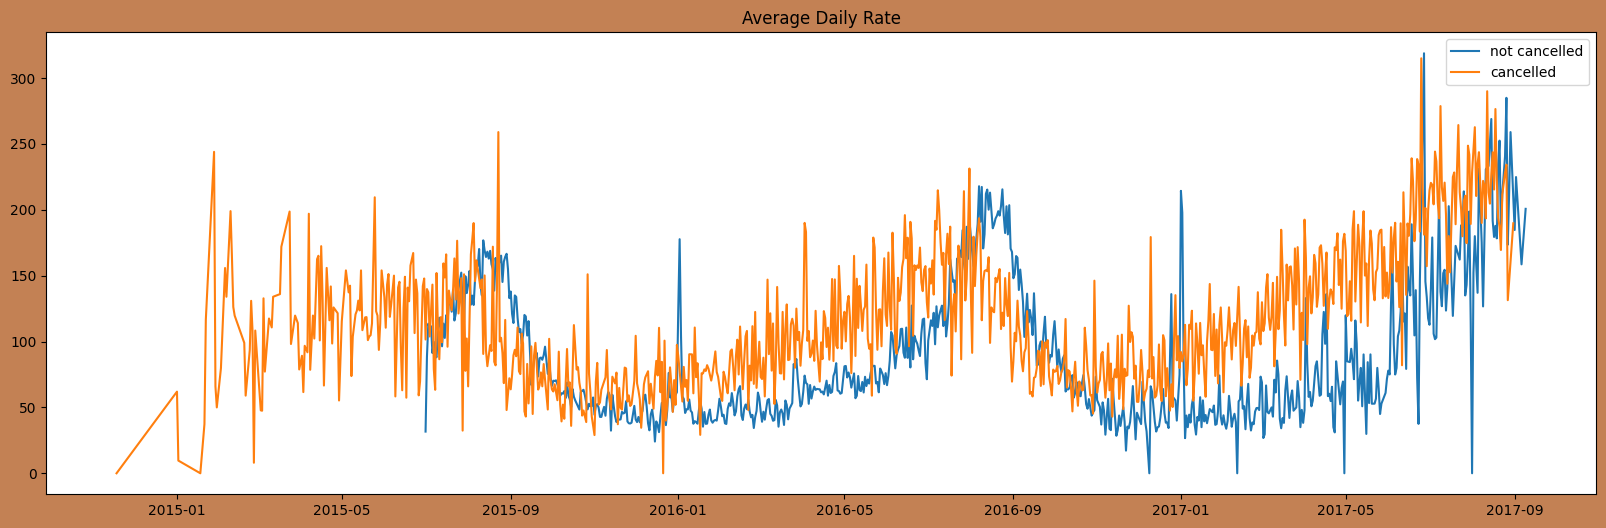

In [ ]:
cancelled_booking_adr= cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_booking_adr.reset_index(inplace=True)
cancelled_booking_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data=booking[booking['is_canceled']==0]
not_cancelled_booking_adr= not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_booking_adr.reset_index(inplace=True)
not_cancelled_booking_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,6), facecolor='#C38154')
plt.title('Average Daily Rate', color="Black")
plt.plot(not_cancelled_booking_adr['reservation_status_date'],not_cancelled_booking_adr['adr'], label='not cancelled')
plt.plot(cancelled_booking_adr['reservation_status_date'],cancelled_booking_adr['adr'], label = 'cancelled')
plt.legend()
plt.show()

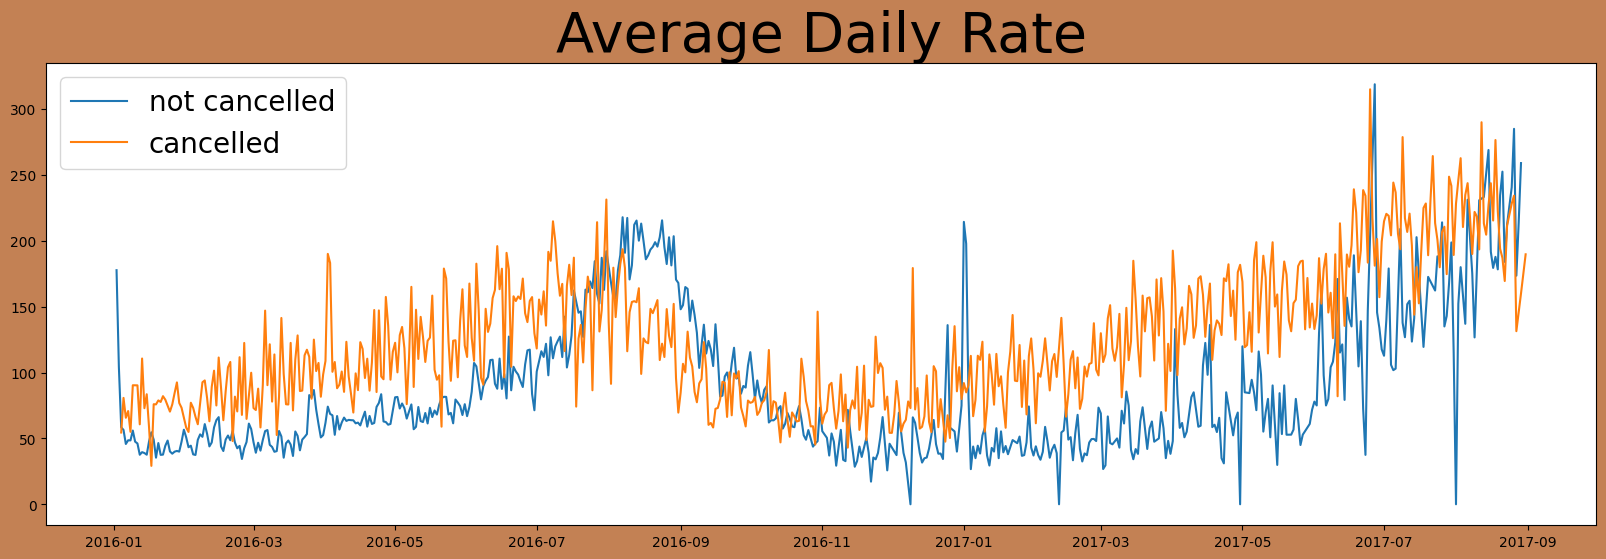

In [ ]:
cancelled_booking_adr = cancelled_booking_adr[(cancelled_booking_adr['reservation_status_date']>'2016') & (cancelled_booking_adr['reservation_status_date']<'2017-09')]

not_cancelled_booking_adr = not_cancelled_booking_adr[(not_cancelled_booking_adr['reservation_status_date']>'2016') & (not_cancelled_booking_adr['reservation_status_date']<'2017-09')]
plt.figure(figsize=(20,6), facecolor='#C38154')
plt.title('Average Daily Rate', fontsize = 40)
plt.plot(not_cancelled_booking_adr['reservation_status_date'],not_cancelled_booking_adr['adr'], label='not cancelled')
plt.plot(cancelled_booking_adr['reservation_status_date'],cancelled_booking_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

In [ ]:
data


,month,adr
0,1.0,105792.43
1,2.0,97680.50
2,3.0,121818.20
3,4.0,116133.02
4,5.0,113114.63
5,6.0,151712.08
6,7.0,157789.36
7,8.0,108619.54
8,9.0,47716.99
9,10.0,52768.07


from matplotlib import pyplot as plt
data['month'].plot(kind='hist', bins=20, title='month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['adr'].plot(kind='hist', bins=20, title='adr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='month', y='adr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['adr']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('adr')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'month'}, axis=1)
              .sort_values('month', ascending=True))
  xs = counted['month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data['month'].plot(kind='line', figsize=(8, 4), title='month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['adr'].plot(kind='line', figsize=(8, 4), title='adr')
plt.gca().spines[['top', 'right']].set_visible(False)